this snippet reads a CSV file into a pandas DataFrame

In [5]:
import pandas as pd

# Load the CSV file into a DataFrame
df_houses = pd.read_csv('c://Users//migue//OneDrive//BeCode//immo-eliza-MAS-FN-analysis//data_output//RawData_house_sale.csv', sep=',')

# Set the float_format parameter to avoid scientific notation in describe()
pd.options.display.float_format = '{:.2f}'.format
print(df_houses)
# print(f'number of rows and columns:', {df_houses.shape})
# print(f'column Names:', df_houses.columns.tolist())
# print(df_houses.dtypes)
# print(df_houses.index)
# print(df_houses.head())
# print(df_houses.describe())

       Unnamed: 0                                                url  \
0               0  https://www.immoweb.be/en/classified/house/for...   
1               1  https://www.immoweb.be/en/classified/house/for...   
2               2  https://www.immoweb.be/en/classified/house/for...   
3               3  https://www.immoweb.be/en/classified/house/for...   
4               4  https://www.immoweb.be/en/classified/house/for...   
...           ...                                                ...   
19975       19975  https://www.immoweb.be/en/classified/house/for...   
19976       19976  https://www.immoweb.be/en/classified/house/for...   
19977       19977  https://www.immoweb.be/en/classified/apartment...   
19978       19978  https://www.immoweb.be/en/classified/apartment...   
19979       19979  https://www.immoweb.be/en/classified/apartment...   

               id    region       province               locality  zip_code  \
0     11128213.00  Flanders  East Flanders              

This code will drop the duplicate records from the DataFrame and print the resulting DataFrame without duplicates. It will print the number of duplicates before and after dropping them, allowing you to verify that the duplicates were successfully removed. 

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('c://Users//migue//OneDrive//BeCode//immo-eliza-MAS-FN-analysis//data_output//RawData_house_sale.csv')

# Count the number of duplicates
num_duplicates = df.duplicated().sum()

# Drop duplicate records
df.drop_duplicates(inplace=True)

# Display the number of duplicates
print("Number of duplicates before dropping:", num_duplicates)

# Display the DataFrame after dropping duplicates
print("DataFrame after dropping duplicates:")
print(df)

# Print the number of duplicates after dropping
print("Number of duplicates after dropping:", df.duplicated().sum())



This code will print the columns in your DataFrame where all records are blank (missing). If there are no such columns, it will print an empty array.

In [52]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('c://Users//migue//OneDrive//BeCode//immo-eliza-MAS-FN-analysis//data_output//RawData_house_sale.csv')

# Find columns with total blank records
blank_columns = df.columns[df.isnull().all()]

# Display the columns with total blank records
print("Columns with total blank records:")
print(blank_columns)


Columns with total blank records:
Index([], dtype='object')


This code will print the columns in your DataFrame where any records contain the substring " " (a blank space). If there are no such columns, it will print an empty array.

In [53]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('c://Users//migue//OneDrive//BeCode//immo-eliza-MAS-FN-analysis//data_output//RawData_house_sale.csv')

# Check for records containing blank spaces in each column
columns_with_blank_spaces = df.applymap(lambda x: ' ' in str(x)).any()

# Display the columns with records containing blank spaces
print("Columns with records containing blank spaces:")
print(columns_with_blank_spaces[columns_with_blank_spaces].index)


C:\Users\migue\AppData\Local\Temp\ipykernel_8312\1445570655.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  columns_with_blank_spaces = df.applymap(lambda x: ' ' in str(x)).any()


Columns with records containing blank spaces:
Index(['province', 'locality'], dtype='object')


This code will print the records in your DataFrame where any column contains the substring " " (a blank space)

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('c://Users//migue//OneDrive//BeCode//immo-eliza-MAS-FN-analysis//data_output//RawData_house_sale.csv')

# Check for records containing blank spaces in each column
records_with_blank_spaces = df[df.apply(lambda row: row.astype(str).str.contains(' ')).any(axis=1)]

# Display the records containing blank spaces
print("Records containing blank spaces:")
print(records_with_blank_spaces)


This code will print one record from your DataFrame that contains the substring " " (a blank space) in any column. Adjust the condition inside str.contains() according to your specific criteria for identifying blank spaces in records. If no such records are found, it will print a message indicating that no records were found.

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('c://Users//migue//OneDrive//BeCode//immo-eliza-MAS-FN-analysis//data_output//RawData_house_sale.csv')

# Check for records containing blank spaces in any column
records_with_blank_spaces = df[df.apply(lambda row: row.astype(str).str.contains(' ')).any(axis=1)]

# Print one record containing blank spaces
if not records_with_blank_spaces.empty:
    print("Record containing blank space:")
    print(records_with_blank_spaces.iloc[0])
else:
    print("No records containing blank space found.")


returns the number of missing values per column in your DataFrame

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('c://Users//migue//OneDrive//BeCode//immo-eliza-MAS-FN-analysis//data_output//RawData_house_sale.csv')

# Count missing values per column
missing_values_count = df.isnull().sum()

# Sort the missing values count in ascending order
missing_values_sorted = missing_values_count.sort_values(ascending=False)

# Display the sorted missing values count
print(missing_values_sorted)


the snippet creates a bar chart representing missing values per column in the DataFrame.

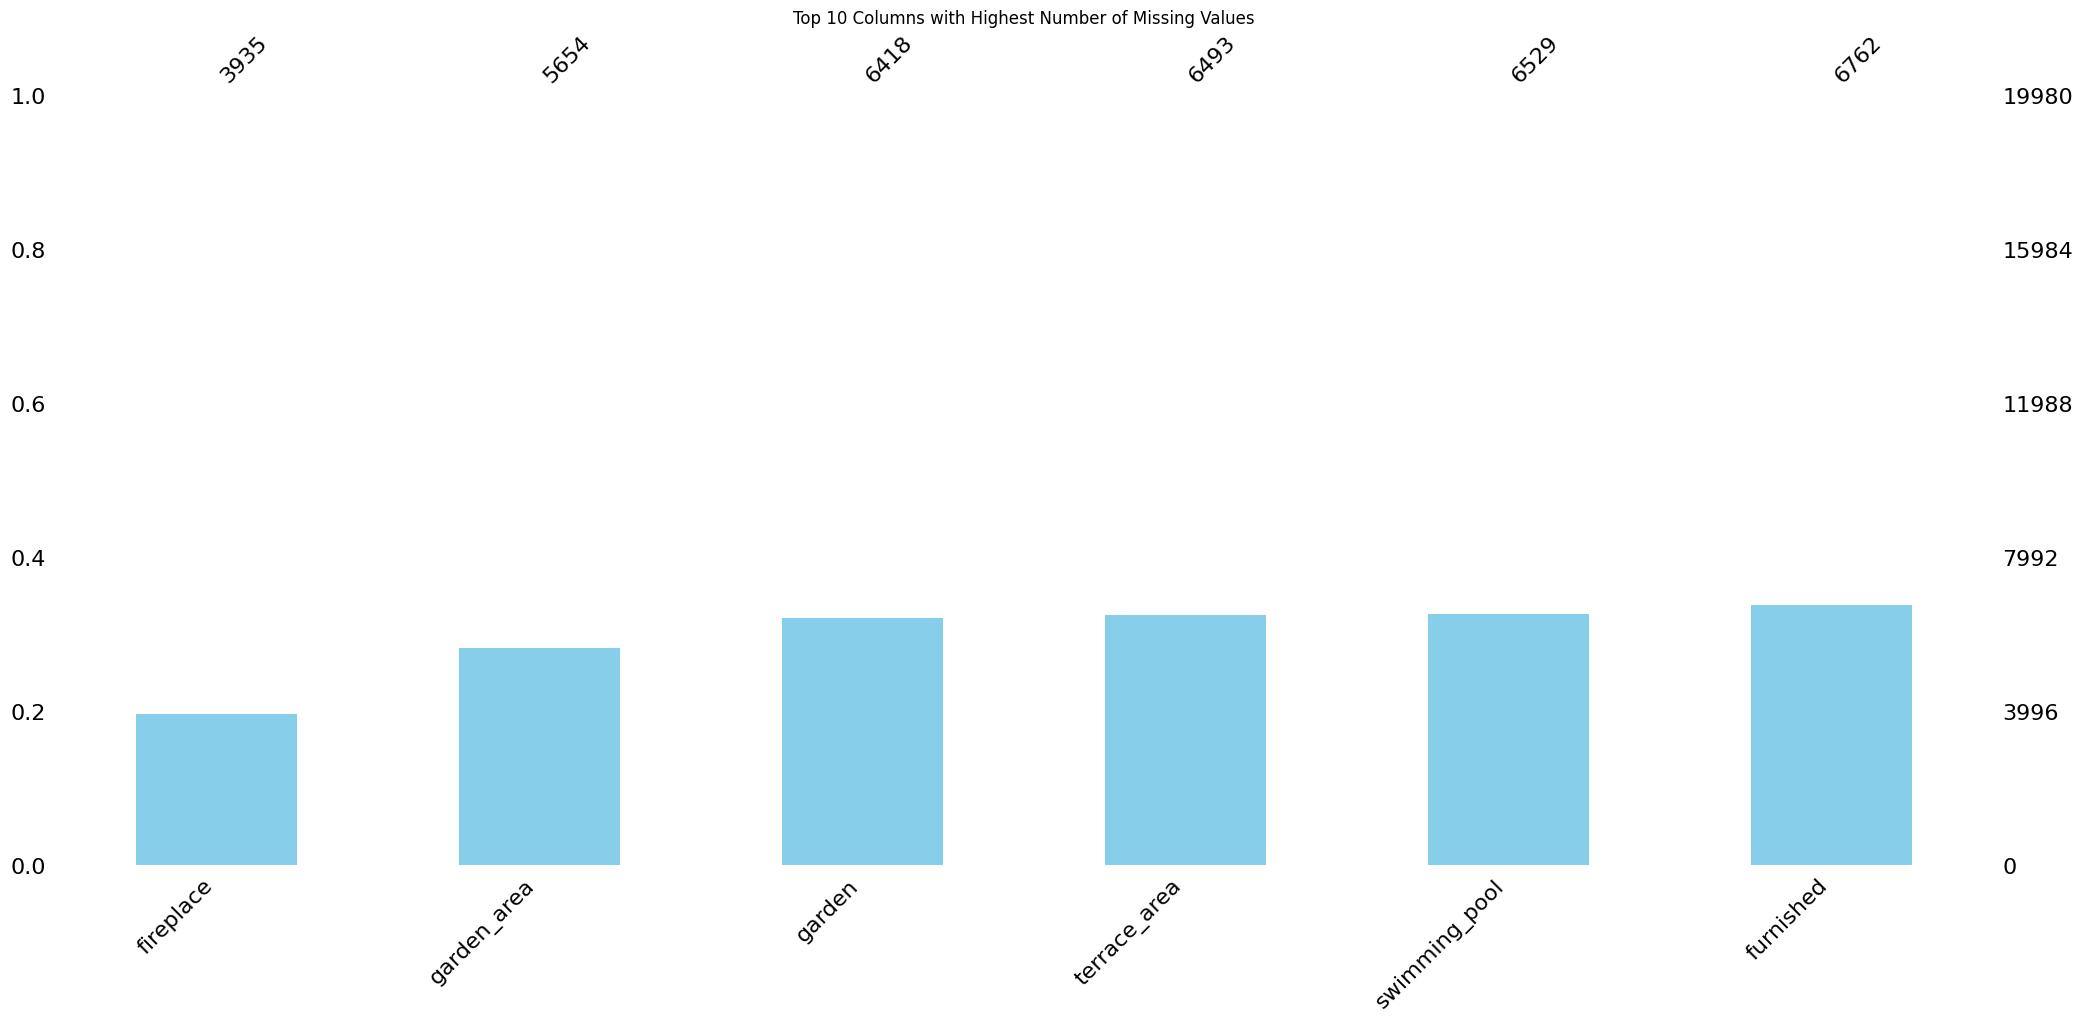

In [11]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

# Load your dataset into a DataFrame
df_houses = pd.read_csv('c://Users//migue//OneDrive//BeCode//immo-eliza-MAS-FN-analysis//data_output//RawData_house_sale.csv')

# Calculate the number of missing values for each column
missing_values_count = df_houses.isnull().sum()

# Sort the columns based on the count of missing values
sorted_missing_values = missing_values_count.sort_values(ascending=False)

# Select only the top 10 columns with the highest number of missing values
top_6_columns = sorted_missing_values.head(6)

# Subset the DataFrame with only the top 10 columns
df_top_missing = df_houses[top_6_columns.index]

# Visualize missing values per column with color
msno.bar(df_top_missing, color='skyblue')
plt.title('Top 10 Columns with Highest Number of Missing Values')
plt.show()




print the index names of the top 10 columns with the highest number of missing values in your DataFrame. Adjust the parameter of nlargest() if you want to display a different number of top columns.

In [9]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('c://Users//migue//OneDrive//BeCode//immo-eliza-MAS-FN-analysis//data_output//RawData_house_sale.csv')

# Count missing values per column
missing_values_count = df.isnull().sum()

# Find the top columns with the highest missing values
top_missing_columns = missing_values_count.nlargest(10)

# Display the index names of the top columns with the highest missing values
print("Index names of the top columns with the highest missing values:")
print(top_missing_columns.index)


Index names of the top columns with the highest missing values:
Index(['fireplace', 'garden_area', 'garden', 'terrace_area', 'swimming_pool',
       'furnished', 'parking_outdoor', 'parking_indoor', 'terrace',
       'energy_type'],
      dtype='object')


This snippet will print the record with the specified 'id' value if it exists in the DataFrame, otherwise it will print a message indicating that the record was not found.

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df_houses = pd.read_csv('c://Users//migue//OneDrive//BeCode//immo-eliza-MAS-FN-analysis//data_output//RawData_house_sale.csv', sep=',')

# Specify the 'id' value you want to locate
target_id = 11130920  # Change this to the desired 'id' value

# Locate the record with the specified 'id' value
target_record = df_houses[df_houses['id'] == target_id]

# Check if the record was found
if not target_record.empty:
    print("Record found:")
    print(target_record)
else:
    print("Record with id {} not found.".format(target_id))


snippet to loop through each column and print unique values for each column. Unique Values: Check the unique values in categorical columns to understand the range of values and identify potential issues such as typos or inconsistencies. 

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df_houses = pd.read_csv('c://Users//migue//OneDrive//BeCode//immo-eliza-MAS-FN-analysis//data_output//RawData_house_sale.csv')

# Loop through each column and print unique values
for column in df_houses.columns:
    print(f"Unique values in {column}:")
    print(df_houses[column].unique())
    print()


Here's a simple example using Matplotlib to create histograms for each numeric column in the DataFrame:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df_houses = pd.read_csv('c://Users//migue//OneDrive//BeCode//immo-eliza-MAS-FN-analysis//data_output//RawData_house_sale.csv')

# Select numeric columns for visualization
numeric_columns = df_houses.select_dtypes(include=['float64', 'int64'])

# Plot histograms for each numeric column
for column in numeric_columns.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df_houses[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


To understand relationships between variables in your dataset, you can use scatter plots, correlation matrices, or pair plots. Here's an example using a correlation matrix to visualize the relationships between numeric variables. Positive correlations are indicated by warmer colors (closer to 1), while negative correlations are indicated by cooler colors (closer to -1). A correlation coefficient close to 0 indicates no linear relationship between the variables.

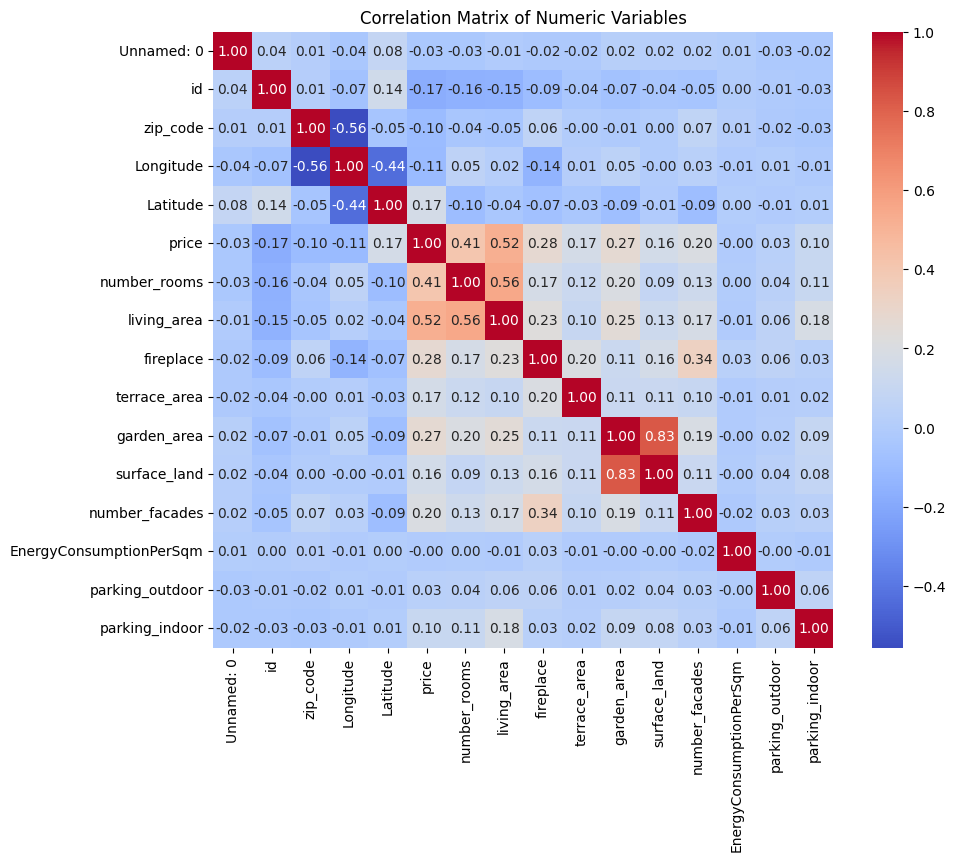

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df_houses = pd.read_csv('c://Users//migue//OneDrive//BeCode//immo-eliza-MAS-FN-analysis//data_output//RawData_house_sale.csv')

# Select numeric columns for correlation analysis
numeric_columns = df_houses.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


To check for incorrect data in your dataset, you can implement data validation checks based on specific criteria or constraints. Here's a script that demonstrates a basic example of data validation by checking if numeric columns contain any negative values. This script checks for negative values in numeric columns of the DataFrame df_houses. If any negative values are found, it prints the name of the column along with the rows containing the incorrect data. If no incorrect data is found, it prints a message indicating that no incorrect data was found.

This code will compute the correlation coefficient between the 'price' column and the specified column in the DataFrame df_houses. The correlation coefficient ranges from -1 to 1, where 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation.

In [90]:
import pandas as pd

# Load the CSV file into a DataFrame
df_houses = pd.read_csv('c://Users//migue//OneDrive//BeCode//immo-eliza-MAS-FN-analysis//data_output//RawData_house_sale.csv')

# Compute correlation between 'price' and another column
correlation_price_other_column = df_houses['price'].corr(df_houses['living_area'])

print("Correlation between 'price' and 'living_area':", correlation_price_other_column)


Correlation between 'price' and 'living_area': 0.5236083664638809


filters observations with NaN values in the 'price' column

In [94]:
import pandas as pd

# Load the CSV file into a DataFrame
df_houses = pd.read_csv('c://Users//migue//OneDrive//BeCode//immo-eliza-MAS-FN-analysis//data_output//RawData_house_sale.csv')

# Filter observations with NaN value in the 'price' column
observation_with_nan_price = df_houses[df_houses['price'].isnull()].head(1)

# Print the full URL of the observation with NaN value in the 'price' column
if not observation_with_nan_price.empty:
    url_of_nan_observation = observation_with_nan_price['url'].iloc[0]
    print("URL of the observation with NaN value in the 'price' column:")
    print(url_of_nan_observation)
else:
    print("No observation with NaN value in the 'price' column found.")

# Print the number of observations before dropping NaN values
print("Number of observations before dropping NaN values:", len(df_houses))

# Drop observations where 'price' is NaN
df_houses = df_houses.dropna(subset=['price'])

# Verify the number of observations after dropping NaN values
print("Number of observations after dropping NaN values:", len(df_houses))


URL of the observation with NaN value in the 'price' column:
https://www.immoweb.be/en/classified/new-real-estate-project-houses/for-sale/herve/4650/10737084
Number of observations before dropping NaN values: 19980
Number of observations after dropping NaN values: 18794


this snippet encodes specified categorical columns into one-hot encoding, and displays the first few rows of the resulting DataFrame with encoded categorical variables

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df_houses = pd.read_csv('c://Users//migue//OneDrive//BeCode//immo-eliza-MAS-FN-analysis//data_output//RawData_house_sale.csv')

# Select categorical columns to encode
categorical_cols = ['region', 'property_type', 'property_subtype']

# Convert categorical columns to one-hot encoding
df_encoded = pd.get_dummies(df_houses, columns=categorical_cols)

# Display the first few rows of the encoded DataFrame
print(df_encoded.head())


snippet using pandas to filter rows by locality:

In [ ]:
import pandas as pd

# Load the dataset
df_houses = pd.read_csv('c://Users//migue//OneDrive//BeCode//immo-eliza-MAS-FN-analysis//data_output//RawData_house_sale.csv')

# Filter rows by locality
locality = 'Brussels'  # Specify the locality you want to filter by
df_filtered = df_houses[df_houses['locality'] == locality]

# Display the filtered DataFrame
print(df_filtered)


the code bellow filters the dataset to retain only the rows corresponding to a specific zip code, and then displays the filtered dataset.

In [ ]:
import pandas as pd

# Load the dataset
df_houses = pd.read_csv('c://Users//migue//OneDrive//BeCode//immo-eliza-MAS-FN-analysis//data_output//RawData_house_sale.csv')

# Filter rows by zip code
zip_code = 1120  # Specify the zip code you want to filter by
df_filtered = df_houses[df_houses['zip_code'] == zip_code]

# Display the filtered DataFrame
print(df_filtered)


create a new column for price per square meter:

In [ ]:
import pandas as pd

# Load the dataset
df_houses = pd.read_csv('c://Users//migue//OneDrive//BeCode//immo-eliza-MAS-FN-analysis//data_output//RawData_house_sale.csv')

# Create a new column for price per square meter
df_houses['price_per_sqm'] = df_houses['price'] / df_houses['living_area']

# Display the first few rows of the DataFrame to verify the new column
print(df_houses.head())


the snippet performs data cleaning by removing rows with missing values, fits a simple linear regression model using living area as a predictor for house prices, and prints a summary of the regression results.

In [ ]:

import pandas as pd
import statsmodels.api as sm

# Load your dataset into a DataFrame
df_houses = pd.read_csv('c://Users//migue//OneDrive//BeCode//immo-eliza-MAS-FN-analysis//data_output//RawData_house_sale.csv')

# Drop rows with missing values in 'price' or 'living_area'
df_clean = df_houses.dropna(subset=['price', 'living_area'])

# Prepare the data for regression analysis
X = df_clean['living_area']  # Predictor variable (living area)
y = df_clean['price']        # Target variable (price)

# Add a constant term to the predictor variable for the intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())


What variables are most subject to outliers?

This script will visualize the distributions of numerical variables using histograms and boxplots, calculate summary statistics, and identify potential outliers.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset into a DataFrame
df_houses = pd.read_csv('c://Users//migue//OneDrive//BeCode//immo-eliza-MAS-FN-analysis//data_output//RawData_house_sale.csv')

# Select numerical variables with continuous data
numerical_vars = ['price', 'living_area', 'terrace_area', 'garden_area', 'surface_land']

# Visualize distributions using histograms and boxplots
for var in numerical_vars:
    plt.figure(figsize=(10, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_houses[var], kde=True, color='skyblue', bins=20)
    plt.title(f'{var} Distribution')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_houses[var], color='salmon')
    plt.title(f'{var} Boxplot')
    plt.xlabel(var)
    
    plt.tight_layout()
    plt.show()

# Calculate summary statistics
summary_stats = df_houses[numerical_vars].describe()
print("Summary Statistics:")
print(summary_stats)

# Identify potential outliers
outliers = {}
for var in numerical_vars:
    Q1 = df_houses[var].quantile(0.25)
    Q3 = df_houses[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[var] = df_houses[(df_houses[var] < lower_bound) | (df_houses[var] > upper_bound)][var]

print("\nPotential Outliers:")
for var, outlier_values in outliers.items():
    if not outlier_values.empty:
        print(f"{var}: {outlier_values.tolist()}")



calculates the skewness of each numerical variable in your dataset. The skewness values indicate the degree of skewness for each variable. Positive skewness (>0) indicates right-skewed distributions, while negative skewness (<0) indicates left-skewed distributions. A skewness value close to 0 suggests that the distribution is approximately symmetric.

In [20]:
import pandas as pd

# Load your dataset into a DataFrame
df_houses = pd.read_csv('c://Users//migue//OneDrive//BeCode//immo-eliza-MAS-FN-analysis//data_output//RawData_house_sale.csv')

# Select numerical variables with continuous data
numerical_cols = df_houses.select_dtypes(include=['float64', 'int64'])

# Calculate skewness for each numerical variable
skewness = numerical_cols.skew()

# Display skewness of each variable
print("Skewness of Variables:")
print(skewness)


Skewness of Variables:
Unnamed: 0                  0.00
id                         -5.75
zip_code                    0.99
Longitude                   0.06
Latitude                   -2.20
price                       6.41
number_rooms                4.66
living_area                13.88
fireplace                   1.43
terrace_area               45.57
garden_area                27.03
surface_land               81.81
number_facades              0.19
EnergyConsumptionPerSqm   127.49
parking_outdoor            77.99
parking_indoor             13.94
dtype: float64


This code will help you assess whether the normalization process has effectively reduced skewness in your data. Lower skewness values after normalization indicate a more symmetrical distribution. The skewed data is normalized using logarithmic transformation

In [27]:
import numpy as np
import pandas as pd
from scipy.stats import skew

# Load your dataset into a DataFrame
df_houses = pd.read_csv('c://Users//migue//OneDrive//BeCode//immo-eliza-MAS-FN-analysis//data_output//RawData_house_sale.csv')

# Select skewed numerical columns (adjust as needed)
skewed_cols = ['terrace_area', 'surface_land', 'EnergyConsumptionPerSqm']

# Normalize skewed data using logarithmic transformation
for col in skewed_cols:
    # Add a small constant to handle zero or negative values
    min_value = df_houses[col].min()
    constant = 1 - min_value if min_value <= 0 else 0
    df_houses[col + '_log'] = np.log(df_houses[col] + constant)

# Calculate skewness of each normalized variable
skewness_after_normalization = {}
for col in df_houses.columns:
    if col.endswith('_log'):  # Check only the new normalized columns
        skewness = skew(df_houses[col].dropna())
        skewness_after_normalization[col] = skewness

# Print skewness of each normalized variable
print("Skewness after normalization:")
for col, skewness in skewness_after_normalization.items():
    print(f"{col}: {skewness}")




Skewness after normalization:
terrace_area_log: -0.20389516951125305
surface_land_log: -1.4460508767140132
EnergyConsumptionPerSqm_log: 0.04383340293608204


Below is a snippet that handles missing values and duplicated rows in a DataFrame:

In [6]:
import pandas as pd

# Load your dataset into a DataFrame
df_houses = pd.read_csv('c://Users//migue//OneDrive//BeCode//immo-eliza-MAS-FN-analysis//data_output//RawData_house_sale.csv')

# Handling missing values
# Drop rows with missing values
df_cleaned = df_houses.dropna()

# Handling duplicated rows
# Drop duplicated rows
df_cleaned = df_cleaned.drop_duplicates()

# Display the shape of the DataFrame after handling missing values and duplicates
print("Shape of DataFrame after cleaning:", df_cleaned.shape)


Shape of DataFrame after cleaning: (3, 30)
